# KNN Clustering on the Iris Dataset

**To implement and demonstrate K-Nearest Neighbors (KNN) clustering for grouping
similar types of flowers using the Iris dataset. We will also visualize the clusters and
evaluate model performance using silhouette scores.**

**Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset/code**

# Import Important Labraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/knn-clustering-dataset/IRIS.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.shape

(150, 5)

**Distribution of Species**

In [8]:
species_count = df['species'].value_counts().rename({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
pd.DataFrame({'Species': ['setosa', 'versicolor', 'virginica'], 'Count': species_count.values})

,Species,Count
0,setosa,50
1,versicolor,50
2,virginica,50


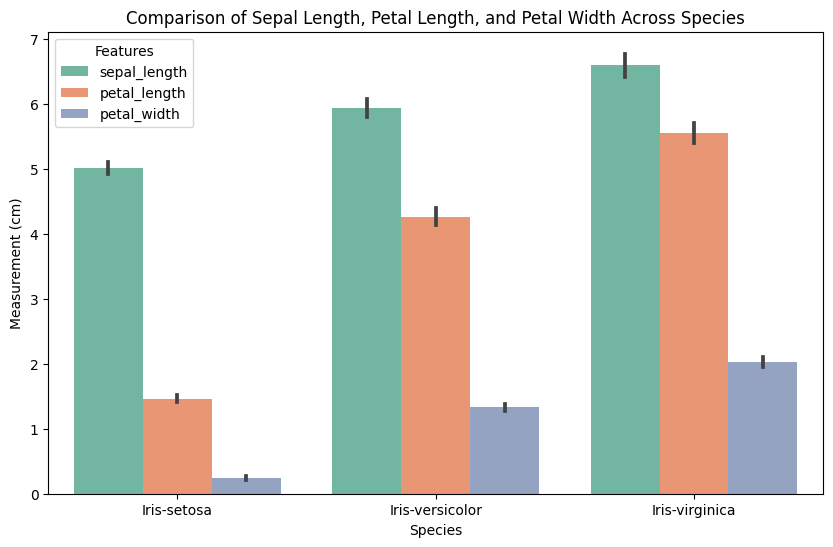

In [9]:
df_melted = df.melt(id_vars='species', value_vars=['sepal_length', 'petal_length', 'petal_width'], 
                           var_name='Feature', value_name='Measurement')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='Measurement', hue='Feature', data=df_melted, palette='Set2')
plt.title('Comparison of Sepal Length, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('Measurement (cm)')
plt.legend(title='Features')
plt.show()

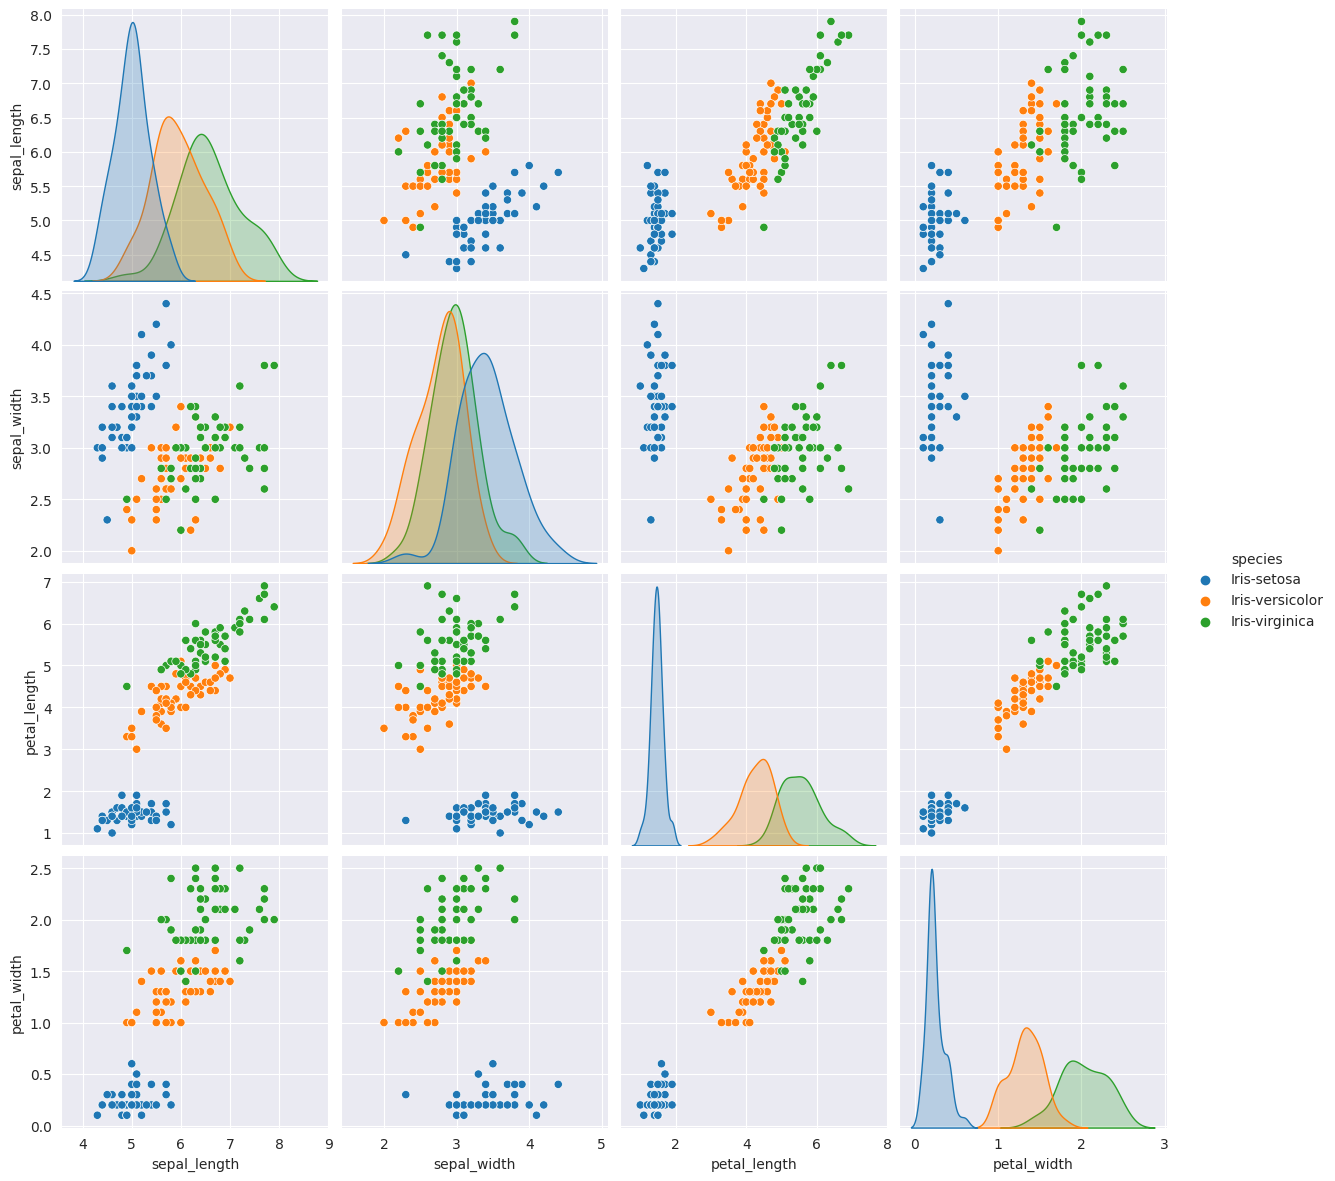

In [10]:
sns.set_style("darkgrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
scaler = LabelEncoder()

df['species'] = scaler.fit_transform(df['species'])

In [13]:
y = df['species']
x = df

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [15]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
cols = x.columns

In [17]:
ms = MinMaxScaler()

X = ms.fit_transform(x)

In [18]:
X = pd.DataFrame(X, columns=[cols])

In [19]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


**The elbow method is used to determine the optimal number of clusters in KMeans by plotting the sum of squared distances (inertia) from each point to its assigned cluster center for different numbers of clusters**

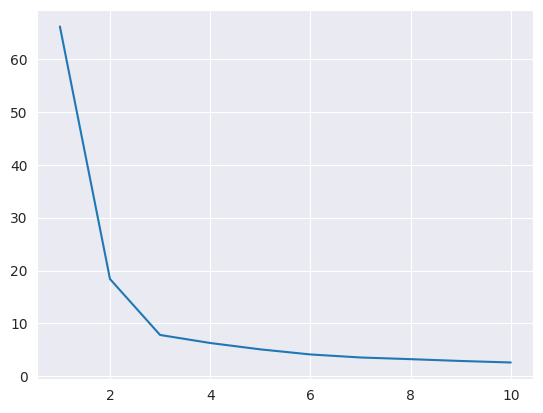

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

**3 clusters according to the Elbow method**

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
kmeans = kmeans.fit(X)

In [22]:
kmeans.cluster_centers_

array([[0.19611111, 0.59083333, 0.07864407, 0.06      , 0.        ],
       [0.63555556, 0.40583333, 0.77152542, 0.8025    , 1.        ],
       [0.45444444, 0.32083333, 0.55254237, 0.51083333, 0.5       ]])

In [23]:
kmeans.inertia_

7.817456892309573

In [24]:
labels = sum(y == kmeans.labels_)

In [25]:
print('Accuracy score: {0:02f}'. format(labels/float(y.size)*100))

Accuracy score: 33.333333


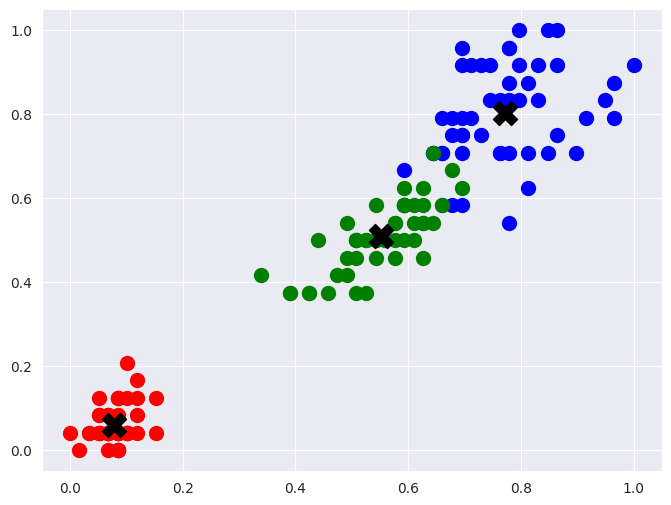

In [26]:
plt.figure(figsize=(8, 6))

# Plot each cluster with different colors
plt.scatter(X.iloc[y_kmeans == 0, 2], X.iloc[y_kmeans == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 2], X.iloc[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 2], X.iloc[y_kmeans == 2, 3], s=100, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='black', label='Centroids', marker='X')

**Trying out with number of clusters = 2**

In [27]:
kmeans_i = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_i = kmeans.fit_predict(X)
kmeans_i = kmeans_i.fit(X)

In [28]:
kmeans_i.inertia_

18.39368828157972

In [29]:
labels_i = sum(y == kmeans_i.labels_)

In [30]:
print('Accuracy score: {0:02f}'. format(labels_i/float(y.size)*100))

Accuracy score: 66.666667


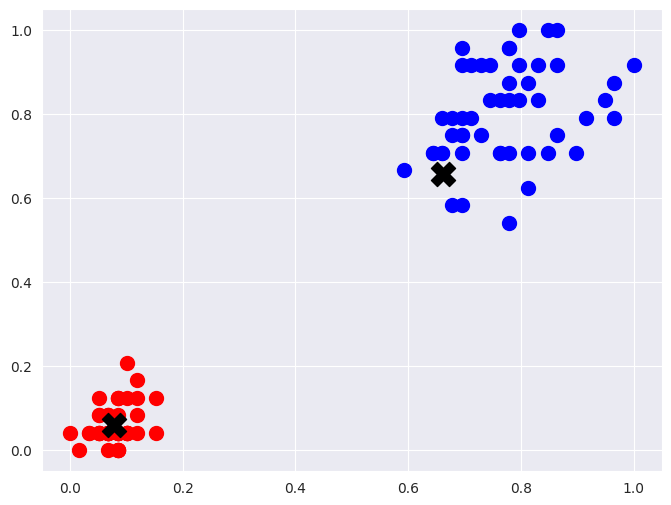

In [31]:
plt.figure(figsize=(8, 6))

# Plot each cluster with different colors
plt.scatter(X.iloc[y_kmeans_i == 0, 2], X.iloc[y_kmeans_i == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans_i == 1, 2], X.iloc[y_kmeans_i == 1, 3], s=100, c='blue', label='Cluster 2')

# Plot the centroids
plt.scatter(kmeans_i.cluster_centers_[:, 2], kmeans_i.cluster_centers_[:, 3], s=300, c='black', label='Centroids', marker='X')

# Making the centroids the mean of their cluster labels

In [32]:
def compute_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids
manual_centroids = compute_centroids(X.to_numpy(), y_kmeans_i, 2)

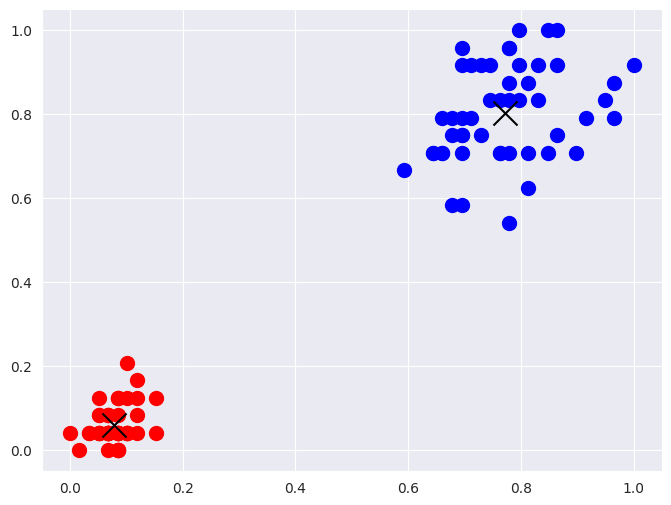

In [33]:
plt.figure(figsize=(8, 6))


plt.scatter(X.iloc[y_kmeans_i == 0, 2], X.iloc[y_kmeans_i == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans_i == 1, 2], X.iloc[y_kmeans_i == 1, 3], s=100, c='blue', label='Cluster 2')

plt.scatter(manual_centroids[:, 2], manual_centroids[:, 3], s=300, c='black', label='Manual Centroids', marker='x')